# Wall temperature violation

## Figure 4 from thermal analysis paper

- Path to original figure data: smb://fs03/LTH_Neutimag/hkromer/02_Simulations/01_Python/COMSOL_new_target/max_temp_vs_rotational_speed/temp_along_z_at_beamspot_violated.py

- Path to the data: /Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/temperature_violation/



In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator


In [6]:
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [7]:
folder = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/temperature_violation/'
output_folder = '/Users/hkromer/polybox/Thesis/Figures/03.RotatingTarget/wall_temperature_violation/'
# datafile from COMSOL
path_to_data = [0,0]  # 25 rpm, 200 rpm
path_to_data[0] = f"{folder}/run40_lam_2_1_300_T_along_z_at_beamspot.txt"
path_to_data[1] = f"{folder}/run40_lam_2_2_300_T_along_z_at_beamspot.txt"
path_to_data

['/Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/temperature_violation//run40_lam_2_1_300_T_along_z_at_beamspot.txt',
 '/Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/temperature_violation//run40_lam_2_2_300_T_along_z_at_beamspot.txt']

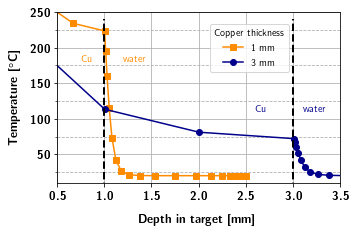

In [8]:
# p = 300 W
# r_beam = 2 mm
# d_Cu = 3 mm
# 3l/min water flowrate at 20 degC
# rotational speed in rpm         maximum surface temperature in degC

# import data
lst_df = []
ii = 0
for path in path_to_data:
	df = pd.read_csv(path, delimiter=r"\s+", skiprows=13)
	# if ii == 0:	
		# df['z_mm'][df['z_mm'] <= 3] = df['z_mm'] * 3  # make the reference point the outer surface of the target
		# df['z_mm'][df['z_mm'] > 3] = df['z_mm'] / 3  # make the reference point the outer surface of the target
	# else:
		# df['z_mm'] = df['z_mm']  # make the reference point the outer surface of the target
	# df = df[ df['z_mm'] >= 2.0 ]  # select only a depth beyond 2 mm
	lst_df.append(df)
	ii = ii + 1
	




# -------------------------------------------------------------------
# plot
# -------------------------------------------------------------------
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

fig = plt.figure(figsize=(8*0.60,5*0.60))

####################
# axis 1
####################
ax1 = fig.add_subplot(1, 1, 1)

# plot
lst_plot = []
lbl = [r'1 mm', r'3 mm']
ii = 0
colors = ['darkorange', 'darkblue']
lst_marker = ['s','o','p']
for df in lst_df:
	_, = ax1.plot(df['z_mm'], df['T_degC'], '-',marker=lst_marker[ii], color=colors[ii], linewidth=1.5, label=lbl[ii])
	ii = ii + 1
	lst_plot.append(_)
# vertical line
ax1.plot((3.0, 3.0), (0, 240), 'k--', linewidth=2)#, label='wall-fluid interface')  # Cu-water interface
ax1.plot((1.0, 1.0), (0, 240), 'k--', linewidth=2)  # Cu-water interface
# ax1.plot((5.0, 5.0), (0, 120), 'k-', linewidth=2)  # water-Cu interface
# axes label
ax1.set_ylabel(r'\textbf{Temperature [$^{\circ}$C]}', fontsize=12, labelpad=10)
ax1.set_xlabel(r'\textbf{Depth in target [mm]}', fontsize=12, labelpad=10)
# limits
plt.ylim(10,250)
plt.xlim(0.5,3.5)
# ticks
# ax1.xaxis.set_ticks([25, 200, 300,500,750,1000])
# ax1.yaxis.set_ticks([170, 175, 180, 185])
# minor ticks x
# minor_locator = AutoMinorLocator(2)
# ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)
# tick font size
ax1.tick_params('x', colors='black', labelsize=12)	
ax1.tick_params('y', colors='black', labelsize=12)	
# grid
ax1.grid(b=True, which='major', linestyle='-')#, color='gray')
ax1.grid(b=True, which='minor', linestyle='--')#, color='gray')
ax1.text(0.75, 180, s=r'Cu', color='darkorange', weight='bold')
ax1.text(1.2, 180, s=r'water', color='darkorange', weight='bold')

ax1.text(2.6, 110, s=r'Cu', color='darkblue', weight='bold')
ax1.text(3.1, 110, s=r'water', color='darkblue', weight='bold')
# ####################
# # other axis
# ####################
# ax2 = ax1.twinx()
# # plot
# ax2.plot(df['vol_flow_rate_lpmin'], df['Re_number'], '--', marker='D', color='darkred', linewidth=2)

# ax2.yaxis.set_ticks([1000,2000,4000,6000])
# #ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))
# # Use the pyplot interface to change just one subplot...
# # cur_axes = plt.gca()
# # plt.yticks([0, 1.4e7], [r"\textbf{0}", r"\textbf{1.4e7}"])
# # ax2.spines['top'].set_visible(False)

# annotations
# ax1.text(2.08, 62, r'\textbf{Copper}', fontsize=12, color='black')
# ax1.text(3.58, 62, r'\textbf{Water}', fontsize=12, color='black')

fig.subplots_adjust(left=0.15, right=0.97, top=0.97, bottom=0.18)

l2 = plt.legend(loc=(0.54,0.650), fontsize=10)
l2.set_title(r"Copper thickness", prop = {'size': 10})
#y label coordinates
# # # ax1.yaxis.set_label_coords(-0.11,0.5)
plt.savefig(f'{output_folder}/temperature_along_z_at_beamspot_violated.pdf', dpi=1200)
plt.savefig(f'{output_folder}/temperature_along_z_at_beamspot_violated.png', dpi=1200)
plt.show()


